# Project : Stock price prediction with regression analysis
--------------> Apurv Deshpande 

In [1]:
# The stock of a corporation signifies ownership in the corporation

# For e.g. if an investor owns 50 shares of stock in a company that has, in total 1000 outstanding shares,
# that investor or shareholder would own and have claim on 5% of the company assets and earnings.

# IMPORTING NECESSARY LIBRARIES AND DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('stocks.csv',index_col="Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-04,1952.589966,2030.010010,1950.760010,2015.250000,2015.250000,20880000
1988-01-05,2056.370117,2075.270020,2021.390015,2031.500000,2031.500000,27200000
1988-01-06,2036.469971,2058.189941,2012.770020,2037.800049,2037.800049,18800000
1988-01-07,2019.890015,2061.510010,2004.640015,2051.889893,2051.889893,21370000
1988-01-08,2046.579956,2058.689941,1898.040039,1911.310059,1911.310059,27440000
...,...,...,...,...,...,...
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,19933.810547,158260000
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039063,19945.039063,158540000
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,19833.679688,188350000


# PERFORMING EDA ->Exploratory Data Analysis

Now, we clean the data by removing duplicate values (if any), and analyze the data using visual techniques.

In [4]:
df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-04,1952.589966,2030.010010,1950.760010,2015.250000,2015.250000,20880000
1988-01-05,2056.370117,2075.270020,2021.390015,2031.500000,2031.500000,27200000
1988-01-06,2036.469971,2058.189941,2012.770020,2037.800049,2037.800049,18800000
1988-01-07,2019.890015,2061.510010,2004.640015,2051.889893,2051.889893,21370000
1988-01-08,2046.579956,2058.689941,1898.040039,1911.310059,1911.310059,27440000
...,...,...,...,...,...,...
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,19933.810547,158260000
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039063,19945.039063,158540000
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,19833.679688,188350000


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

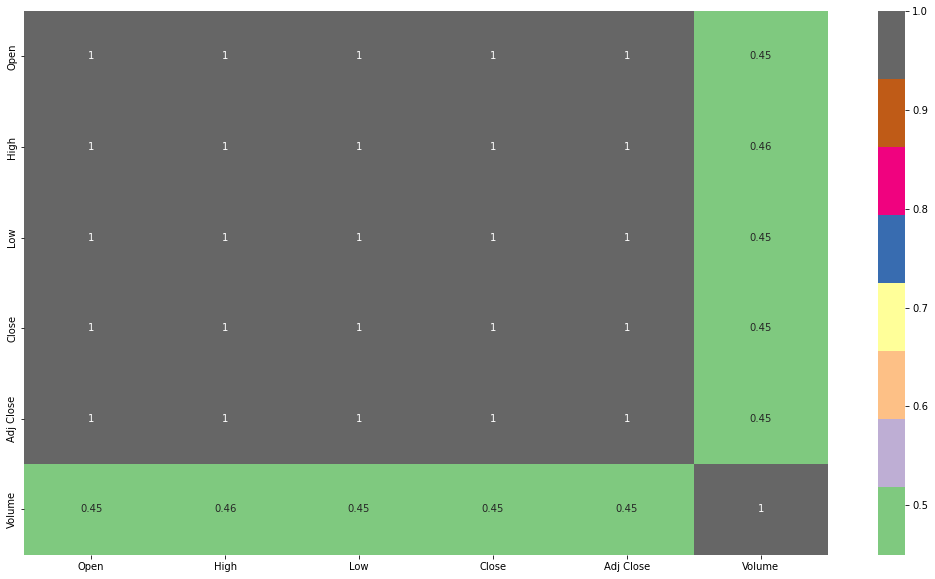

In [6]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(df.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

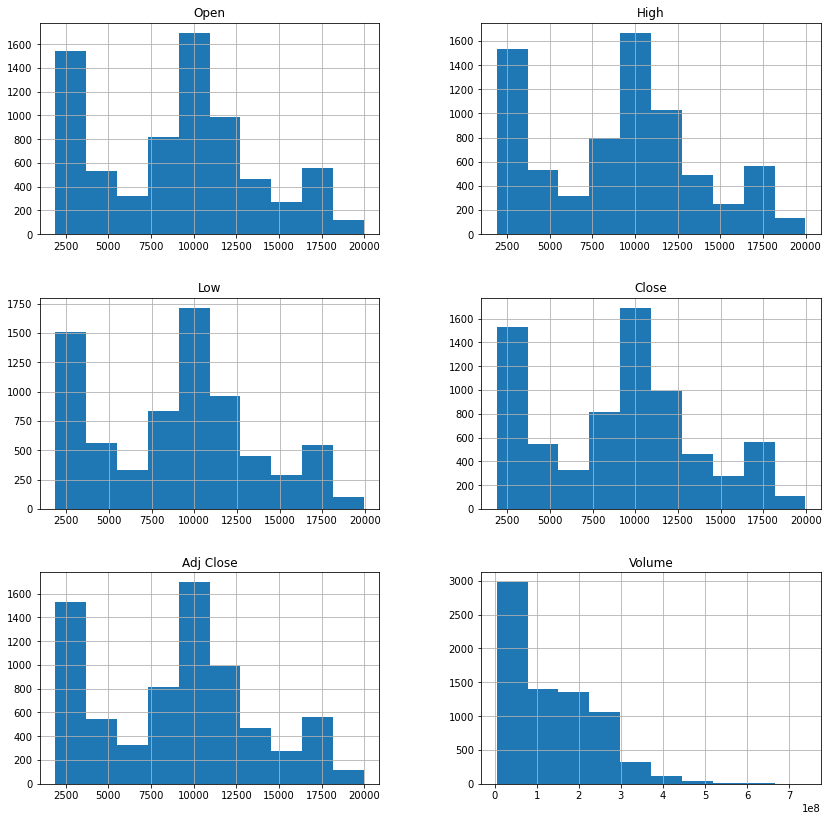

In [7]:
df.hist(figsize=(14,14))

<AxesSubplot:>

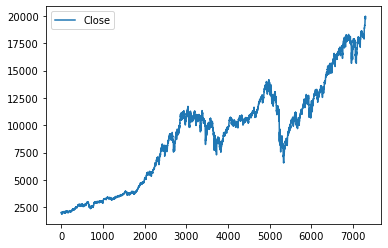

In [8]:
df.plot.line(y="Close",use_index=False)

# Now, we generate a new dataframe, which would contain the same dataset.

In [9]:
#Below is a function that will help us generate a new dataframe. The function will create new leading variables, features
# used to compare values of columns.

In [10]:
def generate_features(df):
    newdf=pd.DataFrame()
    
    #Creates
    newdf['open']=df['Open']
    newdf['open_1']=df['Open'].shift(1)
    newdf['close_1']=df['Close'].shift(1)
    newdf['high_1']=df['High'].shift(1)
    newdf['low_1']=df['Low'].shift(1)
    newdf['volume_1']=df['Volume'].shift(1)
    
    #Average price: we create a variable which has a rolling average of 5,21,252 Average points/values
    newdf['Average Price_5']= df['Close'].rolling(5).mean().shift(1)
    newdf['Average Price_30']= df['Close'].rolling(21).mean().shift(1)
    newdf['Average Price_365']= df['Close'].rolling(252).mean().shift(1)
    newdf['Ratio Average Price_5_30']= newdf['Average Price_5']/newdf['Average Price_30']
    newdf['Ratio Average Price_5_365']= newdf['Average Price_5']/newdf['Average Price_365']
    newdf['Ratio Average Price_30_365']= newdf['Average Price_30']/newdf['Average Price_365']
    #The rolling() function is used to provide rolling window calculations about average price.
    
    #Average volume: we create a variable which has a rolling mean of 5,21,252 volume points/values
    newdf['Average Volume_5']= df['Volume'].rolling(5).mean().shift(1)
    newdf['Average Volume_30']= df['Volume'].rolling(21).mean().shift(1)
    newdf['Average Volume_365']= df['Volume'].rolling(252).mean().shift(1)
    newdf['Ratio Average Volume_5_30']= newdf['Average Volume_5']/newdf['Average Volume_30']
    newdf['Ratio Average Volume_5_365']= newdf['Average Volume_5']/newdf['Average Volume_365']
    newdf['Ratio Average Volume30_365']= newdf['Average Volume_30']/newdf['Average Volume_365']
    #The rolling() function is used to provide rolling window calculations about average volume.
    
    #Standard deviation of prices: we create a variable which has a rolling standard deviation of 5,21,252 data points/values
    newdf['Std Deviation Price_5']= df['Close'].rolling(5).std().shift(1)
    newdf['Std Deviation Price_30']= df['Close'].rolling(21).std().shift(1)
    newdf['Std Deviation Price_365']= df['Close'].rolling(252).std().shift(1)
    newdf['Ratio Std Deviation Price_5_30']= newdf['Std Deviation Price_5']/newdf['Std Deviation Price_30']
    newdf['Ratio Std Deviation Price_5_365']= newdf['Std Deviation Price_5']/newdf['Std Deviation Price_365']
    newdf['Ratio Std Deviation Price_30_365']= newdf['Std Deviation Price_30']/newdf['Std Deviation Price_365']
    #The rolling() function is used to provide rolling window calculations about standard deviation.
    
    #Standard deviation of volume:
    newdf['Std Volume_5']= df['Volume'].rolling(5).std().shift(1)
    newdf['Std Volume_30']= df['Volume'].rolling(21).std().shift(1)
    newdf['Std Volume_365']= df['Volume'].rolling(252).std().shift(1)
    newdf['Ratio Std Volume_5_30']= newdf['Std Volume_5']/newdf['Std Volume_30']
    newdf['Ratio Std Volume_5_365']= newdf['Std Volume_5']/newdf['Std Volume_365']
    newdf['Ratio Std Volume_30_365']= newdf['Std Volume_30']/newdf['Std Volume_365']
    
    # The target column: "Close"  : we will consider the closing vlaue of each day for predictions.
    newdf['close']=df['Close']
    newdf=newdf.dropna(axis=0)
    return newdf

In [11]:
newdf= generate_features(df)
newdf

,open,open_1,close_1,high_1,low_1,volume_1,Average Price_5,Average Price_30,Average Price_365,Ratio Average Price_5_30,...,Ratio Std Deviation Price_5_30,Ratio Std Deviation Price_5_365,Ratio Std Deviation Price_30_365,Std Volume_5,Std Volume_30,Std Volume_365,Ratio Std Volume_5_30,Ratio Std Volume_5_365,Ratio Std Volume_30_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1988-12-30,2183.389893,2169.110107,2182.679932,2193.040039,2165.179932,12220000.0,2168.215967,2146.005697,2061.050753,1.010350,...,0.372085,0.123335,0.331471,4.260343e+06,4.572098e+06,6.461774e+06,0.931814,0.659315,0.707561,2168.570068
1989-01-03,2163.209961,2183.389893,2168.570068,2193.750000,2162.500000,11140000.0,2169.857959,2148.579985,2061.659166,1.009903,...,0.332631,0.106706,0.320794,2.605936e+06,4.627472e+06,6.476618e+06,0.563145,0.402361,0.714489,2144.639893
1989-01-04,2153.750000,2163.209961,2144.639893,2168.389893,2127.139893,17310000.0,2164.999951,2150.616176,2062.108134,1.006688,...,0.677084,0.191809,0.283287,3.633685e+06,4.665697e+06,6.453401e+06,0.778809,0.563065,0.722983,2177.679932
1989-01-05,2184.290039,2153.750000,2177.679932,2183.389893,2146.610107,15710000.0,2167.999951,2154.682838,2062.663213,1.006181,...,0.914097,0.204474,0.223690,3.057422e+06,4.671999e+06,6.455623e+06,0.654414,0.473606,0.723710,2190.540039
1989-01-06,2195.889893,2184.290039,2190.540039,2205.179932,2173.040039,20310000.0,2172.821973,2157.862840,2063.213412,1.006932,...,1.089841,0.245020,0.224822,3.744766e+06,4.825499e+06,6.454034e+06,0.776037,0.580221,0.747672,2194.290039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,19908.609375,19922.679688,19918.880859,19933.830078,19882.189453,258290000.0,19912.386328,19535.447173,17881.612944,1.019295,...,0.145161,0.056500,0.389224,1.346794e+08,1.389864e+08,6.812711e+07,0.969011,1.976884,2.040104,19933.810547
2016-12-27,19943.460938,19908.609375,19933.810547,19934.150391,19899.060547,158260000.0,19930.466406,19575.953404,17891.063899,1.018110,...,0.096765,0.036682,0.379081,5.569665e+07,1.347603e+08,6.801908e+07,0.413302,0.818839,1.981214,19945.039063
2016-12-28,19964.310547,19943.460938,19945.039063,19980.240234,19939.800781,158540000.0,19942.862110,19613.710473,17900.654254,1.016782,...,0.060066,0.022202,0.369636,6.011245e+07,1.277054e+08,6.798300e+07,0.470712,0.884228,1.878490,19833.679688


In [12]:
newdf.isnull().sum()

open                                0
open_1                              0
close_1                             0
high_1                              0
low_1                               0
volume_1                            0
Average Price_5                     0
Average Price_30                    0
Average Price_365                   0
Ratio Average Price_5_30            0
Ratio Average Price_5_365           0
Ratio Average Price_30_365          0
Average Volume_5                    0
Average Volume_30                   0
Average Volume_365                  0
Ratio Average Volume_5_30           0
Ratio Average Volume_5_365          0
Ratio Average Volume30_365          0
Std Deviation Price_5               0
Std Deviation Price_30              0
Std Deviation Price_365             0
Ratio Std Deviation Price_5_30      0
Ratio Std Deviation Price_5_365     0
Ratio Std Deviation Price_30_365    0
Std Volume_5                        0
Std Volume_30                       0
Std Volume_3

#  Dividing the data into dependent and independent features.

In [13]:
X = newdf.drop('close',axis=1)
y = newdf['close']

In [14]:
X.head()

,open,open_1,close_1,high_1,low_1,volume_1,Average Price_5,Average Price_30,Average Price_365,Ratio Average Price_5_30,...,Std Deviation Price_365,Ratio Std Deviation Price_5_30,Ratio Std Deviation Price_5_365,Ratio Std Deviation Price_30_365,Std Volume_5,Std Volume_30,Std Volume_365,Ratio Std Volume_5_30,Ratio Std Volume_5_365,Ratio Std Volume_30_365
Date,,,,,,,,,,,,,,,,,,,,,
1988-12-30,2183.389893,2169.110107,2182.679932,2193.040039,2165.179932,12220000.0,2168.215967,2146.005697,2061.050753,1.010350,...,70.830944,0.372085,0.123335,0.331471,4.260343e+06,4.572098e+06,6.461774e+06,0.931814,0.659315,0.707561
1989-01-03,2163.209961,2183.389893,2168.570068,2193.750000,2162.500000,11140000.0,2169.857959,2148.579985,2061.659166,1.009903,...,71.093959,0.332631,0.106706,0.320794,2.605936e+06,4.627472e+06,6.476618e+06,0.563145,0.402361,0.714489
1989-01-04,2153.750000,2163.209961,2144.639893,2168.389893,2127.139893,17310000.0,2164.999951,2150.616176,2062.108134,1.006688,...,71.259794,0.677084,0.191809,0.283287,3.633685e+06,4.665697e+06,6.453401e+06,0.778809,0.563065,0.722983
1989-01-05,2184.290039,2153.750000,2177.679932,2183.389893,2146.610107,15710000.0,2167.999951,2154.682838,2062.663213,1.006181,...,71.613611,0.914097,0.204474,0.223690,3.057422e+06,4.671999e+06,6.455623e+06,0.654414,0.473606,0.723710
1989-01-06,2195.889893,2184.290039,2190.540039,2205.179932,2173.040039,20310000.0,2172.821973,2157.862840,2063.213412,1.006932,...,72.061726,1.089841,0.245020,0.224822,3.744766e+06,4.825499e+06,6.454034e+06,0.776037,0.580221,0.747672


In [15]:
y.head()

Date
1988-12-30    2168.570068
1989-01-03    2144.639893
1989-01-04    2177.679932
1989-01-05    2190.540039
1989-01-06    2194.290039
Name: close, dtype: float64

# Splitting the data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=100)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((4940, 30), (4940,), (2118, 30), (2118,))

# Apply Normalization and train the model using LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression(normalize=True)

#As you need to predict a numeral value based on some parameters, you will have to use Linear Regression.
#The model needs to learn on your training set. This is done by using the '.fit' command:

lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [19]:
pred = lr.predict(X_test)
pred

array([13264.84073244, 12765.12286789, 15023.20938207, ...,
        8762.52554483,  3281.40454248, 12355.16891067])

In [20]:
y_test

Date
2007-05-07    13312.969727
2008-04-24    12848.950195
2013-08-26    14946.459961
2008-06-18    12029.059570
1998-02-02     8107.779785
                  ...     
2010-08-12    10319.950195
2011-03-04    12169.879883
2003-05-28     8793.120117
1992-06-19     3285.399902
2012-01-09    12392.690430
Name: close, Length: 2118, dtype: float64

Now we compare the actual values with the ones which the model predicted.

In [21]:
frame = pd.DataFrame({"Actual" : y_test , "Predicted" : pred})
frame

,Actual,Predicted
Date,,
2007-05-07,13312.969727,13264.840732
2008-04-24,12848.950195,12765.122868
2013-08-26,14946.459961,15023.209382
2008-06-18,12029.059570,12159.784408
1998-02-02,8107.779785,7916.125787
...,...,...
2010-08-12,10319.950195,10346.276766
2011-03-04,12169.879883,12269.958209
2003-05-28,8793.120117,8762.525545


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [23]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,pred)))
print("R^2 Score:",r2_score(y_test, pred))

Mean Absoulte Error: 65.8927382854135
Mean Squared Error: 9869.07779894268
Root Mean Squared Error: 99.34323227549363
R^2 Score: 0.9995104733638424


In [24]:
lr.score(X_train, y_train)

0.9994649810444398

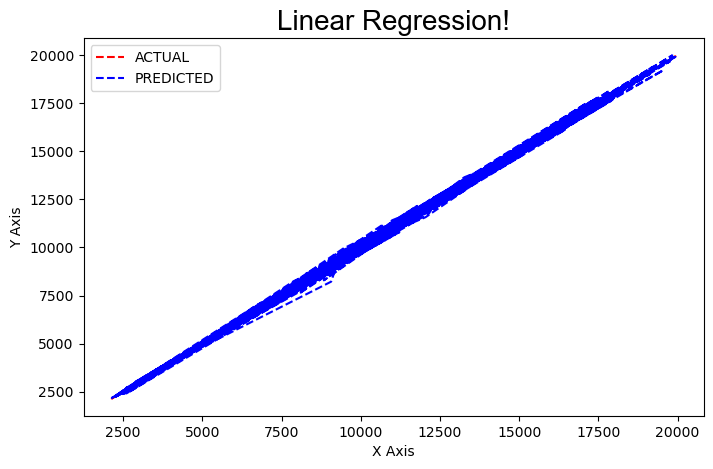

In [25]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(y_test, y_test, 'r--',label='ACTUAL') 
plt.plot(y_test, pred, 'b--',label='PREDICTED')

plt.title('Linear Regression!', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# LinearRegression always uses the least-squares as a loss function.


# For SGDRegressor you can specify a loss function and it uses Stochastic Gradient Descent (SGD) to fit.

In [26]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler=StandardScaler()
X_scaled_train= scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

#In machine learning, a hyperparameter is a parameter whose value is used to control the learning process.
param_grid={
    "alpha":[1e-5,3e-5,1e-4],
    "eta0":[0.01,0.03,0.1]
}

# l1, l2

from sklearn.linear_model import SGDRegressor

lr=SGDRegressor(penalty="l2", max_iter=100)
grid_search= GridSearchCV(lr, param_grid, cv=5, scoring="r2")
grid_search.fit(X_scaled_train, y_train)

print(grid_search.best_params_)

{'alpha': 3e-05, 'eta0': 0.03}


In [27]:
lr_best= grid_search.best_estimator_

predictions_lr= lr_best.predict(X_test)

# Comparing predicted and actual values :

In [28]:
frame3 = pd.DataFrame({"Actual" : y_test , "Predicted" : predictions_lr})
frame3

,Actual,Predicted
Date,,
2007-05-07,13312.969727,13258.470262
2008-04-24,12848.950195,12758.448175
2013-08-26,14946.459961,15009.308839
2008-06-18,12029.059570,12204.997430
1998-02-02,8107.779785,7904.545660
...,...,...
2010-08-12,10319.950195,10472.245344
2011-03-04,12169.879883,12202.286268
2003-05-28,8793.120117,8664.007465


In [29]:
print("Mean Absoulte Error:",(mean_absolute_error(y_test, predictions_lr)))
print("Mean Squared Error:",(mean_squared_error(y_test, predictions_lr)))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,predictions_lr)))
print("Performance Score:",(r2_score(y_test, predictions_lr)))

Mean Absoulte Error: 73.15076235250142
Mean Squared Error: 11411.438698563981
Root Mean Squared Error: 106.82433570382724
Performance Score: 0.9994339690786078


Below, we use a different approach for linear regression.

In [30]:
start_train= "1988-01-01"
end_train="2015-12-31"

start_test="2016-01-01"
end_test="2016-12-31"

In [31]:
data_train=newdf[start_train:end_train]

X_train= data_train.drop('close',axis=1).values
y_train= data_train['close'].values
data_test= newdf[start_test:end_test]

X_test= data_test.drop('close',axis=1).values
y_test= data_test['close'].values

In [32]:
scaler=StandardScaler()

X_scaled_train= scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

param_grid={
    "alpha":[1e-5,3e-5,1e-4],
    "eta0":[0.01,0.03,0.1]
}

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [34]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [35]:
pred = lr.predict(X_test)
pred

array([17374.97910258, 17138.1512139 , 17145.96917504, 16863.28426431,
       16558.53748062, 16428.78980927, 16472.75287785, 16560.26230125,
       16225.7838623 , 16328.33250967, 16080.97138338, 15976.54086261,
       15784.55041377, 16040.54948977, 16101.19283089, 15951.43697202,
       16187.21974833, 16029.95982551, 16142.43890595, 16416.67910316,
       16349.59674329, 16259.05148428, 16285.91586438, 16411.54231384,
       16029.17549573, 15941.47134545, 16080.73738421, 15892.91302272,
       15752.2283065 , 16075.69929172, 16243.28875847, 16524.66549097,
       16398.35698306, 16443.77342742, 16574.2669565 , 16387.595964  ,
       16500.8664477 , 16716.01291061, 16623.47755149, 16612.03338138,
       16799.85090103, 16865.75207507, 16925.34561706, 16950.67027796,
       16992.03767548, 16978.58210719, 17018.9952197 , 17048.16636898,
       17183.30905081, 17184.78435217, 17224.49116466, 17304.34245209,
       17470.66694883, 17536.47766298, 17532.16069134, 17581.17788755,
      

# Comparing predicted and actual values :

In [36]:
frame2 = pd.DataFrame({"Actual" : y_test , "Predicted" : pred})
frame2

,Actual,Predicted
0,17148.939453,17374.979103
1,17158.660156,17138.151214
2,16906.509766,17145.969175
3,16514.099609,16863.284264
4,16346.450195,16558.537481
...,...,...
247,19933.810547,19923.870961
248,19945.039063,19962.527970
249,19833.679688,19986.174410
250,19819.779297,19815.350103


In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [38]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,pred)))
print("Performance Score:",r2_score(y_test, pred))

Mean Absoulte Error: 87.61584615095649
Mean Squared Error: 13836.601405179292
Root Mean Squared Error: 117.62908401062762
Performance Score: 0.984370028062823


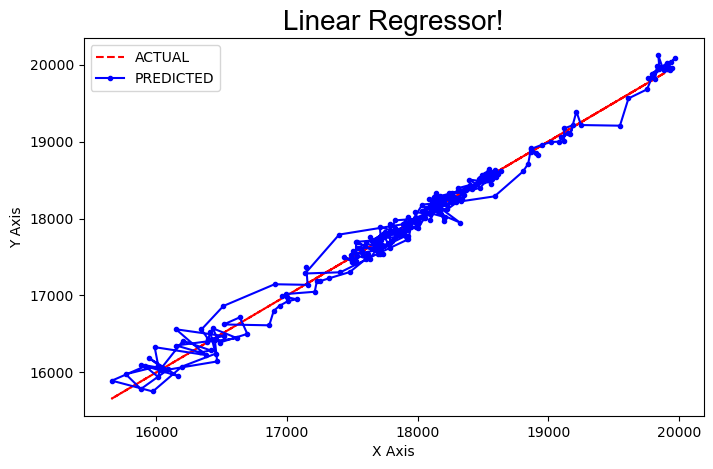

In [39]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(y_test, y_test, 'r--',label='ACTUAL') 
plt.plot(y_test, pred, 'b.-',label='PREDICTED')

plt.title('Linear Regressor!', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [41]:
train = newdf[:987]
valid = newdf[987:]

x_train = train.drop('close', axis=1)
y_train = train['close']
x_valid = valid.drop('close', axis=1)
y_valid = valid['close']

In [42]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#fit the model and make predictions
lr.fit(x_train,y_train.ravel())
preds = lr.predict(x_valid)
print(preds)

[2209.53141077 2214.59327552 2216.25217866 ... 3412.20095319 3400.97134879
 3396.79741264]


In [43]:
print('Accuracy of trained model',lr.score(x_train,y_train))

Accuracy of trained model 0.9951128684710819


In [44]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

8533.009496535487

# Now , we see results with Random Forest Regressor

In [49]:
start_train= "1988-01-01"
end_train="2015-12-31"

start_test="2016-01-01"
end_test="2016-12-31"

In [50]:
data_train=newdf[start_train:end_train]

X_train= data_train.drop('close',axis=1).values
y_train= data_train['close'].values
data_test= newdf[start_test:end_test]

X_test= data_test.drop('close',axis=1).values
y_test= data_test['close'].values

In [51]:
param_grid={
    'max_depth':[5,10,15],
    'min_samples_split':[5,10],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[3,4]
}

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100, n_jobs=-1)

grid_search= GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5}


In [53]:
rf_best= grid_search.best_estimator_

predictions_rf= rf_best.predict(X_scaled_test)

In [54]:
framerf = pd.DataFrame({"Actual" : y_test , "Predicted" : predictions_rf})
framerf

,Actual,Predicted
0,17148.939453,17387.296404
1,17158.660156,17223.622627
2,16906.509766,17151.325610
3,16514.099609,16888.644058
4,16346.450195,16459.764202
...,...,...
247,19933.810547,18215.200200
248,19945.039063,18219.407187
249,19833.679688,18221.570973
250,19819.779297,18221.893817


In [55]:
print("Root Mean Squared Error:",(mean_squared_error(y_test, predictions_rf)))
print("Mean Squared Error:",(mean_absolute_error(y_test, predictions_rf)))
print('R^2 Score',(r2_score(y_test, predictions_rf)))

Root Mean Squared Error: 257370.41909988286
Mean Squared Error: 299.40404148752185
R^2 Score 0.7092716404705504


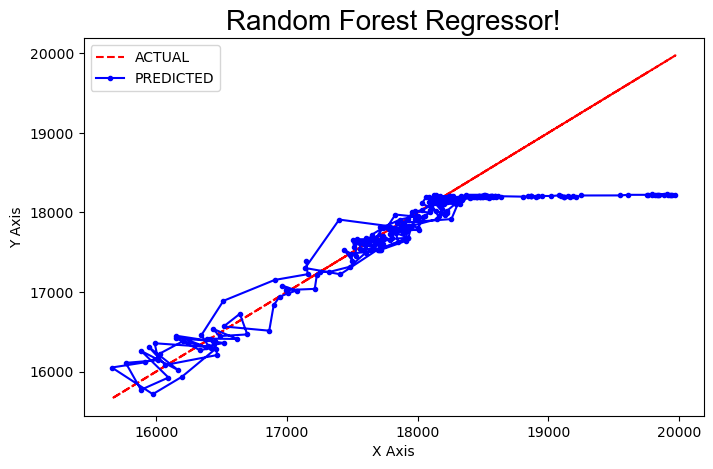

In [56]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(y_test, y_test, 'r--',label='ACTUAL') 
plt.plot(y_test, predictions_rf, 'b.-',label='PREDICTED')

plt.title('Random Forest Regressor!', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# Thus, we have predicted stock price using regression techinques.

# Thank You